- DANN
- kd-tree
- LSH

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
plt.rcParams['figure.figsize'] = (10,8)

Implement a class that works the same as sklearn knn-algorithm.

**Small tip:** you can make two classes:

1) class MyNNEstimator(BaseEstimator, ClassifierMixin);

2) class MyNNClassifier(MyNNEstimator):

After that, you'll have to check your algorithm on the data below and achive max f1 measure.

f1 measure function should be implemented manually. 

__Small tip:__ use space transformations

# Data

In [4]:
data = pd.read_csv('./chips.txt')
data.head()

,x,y,cls
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
data['cls'].value_counts()

0    60
1    58
Name: cls, dtype: int64

In [6]:
X = data.loc[:,['x', 'y']]
y = data.loc[:,'cls']
X.head()
y.head()

,x,y
0,0.051267,0.69956
1,-0.092742,0.68494
2,-0.213710,0.69225
3,-0.375000,0.50219
4,-0.513250,0.46564


0    1
1    1
2    1
3    1
4    1
Name: cls, dtype: int64

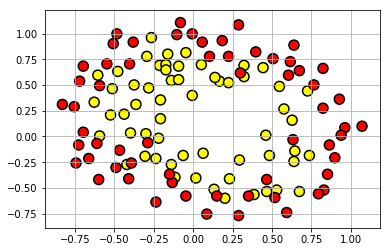

In [7]:
# Взглянем на данные
plot_row = plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, 
cmap='autumn', edgecolors='black', linewidth=1.5)
plt.grid();

In [8]:
# Разбиваем на тестовую и обучающую выборки
np.random.seed(112358)
test_inds = np.random.choice(data.index, replace=False,
                             size = round(len(data.index) * 1 / 3))
test_inds.sort()
test_inds

array([  1,   2,   7,  12,  15,  16,  18,  23,  25,  27,  30,  32,  36,
        37,  52,  54,  57,  58,  62,  63,  68,  70,  72,  76,  78,  80,
        82,  86,  87,  89,  91,  92,  96,  99, 104, 106, 107, 111, 114])

In [9]:
X_test = data[['x', 'y']].iloc[test_inds]
X_train = data[['x', 'y']].drop(test_inds)

X_test.shape
X_train.shape

(39, 2)

(79, 2)

In [10]:
y_test = data['cls'].iloc[test_inds]
y_train = data['cls'].drop(test_inds)

y_test.size
y_train.size

39

79

# Sklearn-Knn

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
temp_cls = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [13]:
temp_cls.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
temp_cls.score(X_train, y_train)
temp_cls.score(X_test, y_test)

0.8354430379746836

0.7948717948717948

In [15]:
# temp_cls.predict?

In [16]:
temp_cls.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1])

In [17]:
temp_cls.predict_proba(X_test)[:10]

array([[0. , 1. ],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.2, 0.8],
       [0. , 1. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4]])

In [18]:
from sklearn.metrics import f1_score
f1_score(y_train, temp_cls.predict(X_train))
f1_score(y_test, temp_cls.predict(X_test))

0.8470588235294119

0.7777777777777778

In [19]:
# temp_cls.weights?

In [20]:
temp_cls.get_params()

temp_cls._get_param_names()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

['algorithm',
 'leaf_size',
 'metric',
 'metric_params',
 'n_jobs',
 'n_neighbors',
 'p',
 'weights']

In [21]:
temp_cls._y
temp_cls._fit_X[:5]
temp_cls._estimator_type

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

array([[ 0.051267,  0.69956 ],
       [-0.375   ,  0.50219 ],
       [-0.51325 ,  0.46564 ],
       [-0.52477 ,  0.2098  ],
       [-0.39804 ,  0.034357]])

'classifier'

## Cross Validation

## 1. CV by hands

In [22]:
SEED = 112358
N_FOLDS = 5

accuracy_train = []
accuracy_test = []
f1_score_train = []
f1_score_test = []

In [23]:
# Разбиваем на тестовую и обучающую выборки
for i in range(N_FOLDS):
    np.random.seed(SEED + i)
    test_inds = np.random.choice(data.index, replace=False,
                                 size = round(len(data.index) * 1 / N_FOLDS))
    test_inds.sort()

    X_test = data[['x', 'y']].iloc[test_inds]
    X_train = data[['x', 'y']].drop(test_inds)

    y_test = data['cls'].iloc[test_inds]
    y_train = data['cls'].drop(test_inds)

    temp_cls = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)
    temp_cls.fit(X_train, y_train)

    acc_train = temp_cls.score(X_train, y_train)
    acc_test = temp_cls.score(X_test, y_test)
    print('Accuracy train:', acc_train)
    print('Accuracy test:', acc_test)
    accuracy_train.append(acc_train)
    accuracy_test.append(acc_test)

    f1_train = f1_score(y_train, temp_cls.predict(X_train))
    f1_test = f1_score(y_test, temp_cls.predict(X_test))
    print('f1_score train:', f1_train)
    print('f1_score test:', f1_test)
    f1_score_train.append(f1_train)
    f1_score_test.append(f1_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy train: 0.8404255319148937
Accuracy test: 0.75
f1_score train: 0.8598130841121495
f1_score test: 0.6666666666666666


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy train: 0.8404255319148937
Accuracy test: 0.75
f1_score train: 0.845360824742268
f1_score test: 0.7272727272727272


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy train: 0.8191489361702128
Accuracy test: 0.7083333333333334
f1_score train: 0.8210526315789474
f1_score test: 0.6956521739130435


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy train: 0.8404255319148937
Accuracy test: 0.75
f1_score train: 0.8598130841121496
f1_score test: 0.7


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

Accuracy train: 0.851063829787234
Accuracy test: 0.7083333333333334
f1_score train: 0.8478260869565217
f1_score test: 0.7407407407407408


In [24]:
print('Accuracy of train: %s' % np.mean(accuracy_train))
print('Accuracy of test:  %s' % np.mean(accuracy_test))
print('f1_score of train: %s' % np.mean(f1_score_train))
print('f1_score of test:  %s' % np.mean(f1_score_test))

Accuracy of train: 0.8382978723404255
Accuracy of test:  0.7333333333333334
f1_score of train: 0.8467731423004073
f1_score of test:  0.7060664617186357


## 2. CV cross_val_score

In [25]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [26]:
temp_cls = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [27]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 112358) # shuffle=True - важно

cross_val_score(temp_cls, X, y, scoring='f1', cv=skf, n_jobs=-1)

array([0.7826087 , 0.8       , 0.57142857, 0.86956522, 0.86956522])

## 3. CV by GridSearchCV

In [28]:
from sklearn.model_selection import GridSearchCV

In [29]:
temp_cls = KNeighborsClassifier(n_neighbors=5, n_jobs=-1)

In [30]:
param_grid = {
    'n_neighbors':range(5, 10),
    'metric':['cityblock', 'minkowski'],
    'p': [2, 3, 4]
}

In [31]:
neigh_cv = GridSearchCV(temp_cls, param_grid,
                        cv=skf, n_jobs=-1,
                        scoring='f1',
                        error_score='f1',
                        verbose=True, refit=True)

In [32]:
neigh_cv.fit(X, y)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:    8.4s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=112358, shuffle=True),
       error_score='f1',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': range(5, 10), 'metric': ['cityblock', 'minkowski'], 'p': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=True)

In [33]:
neigh_cv.grid_scores_

/Users/max/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.83223, std: 0.08343, params: {'metric': 'cityblock', 'n_neighbors': 5, 'p': 2},
 mean: 0.83223, std: 0.08343, params: {'metric': 'cityblock', 'n_neighbors': 5, 'p': 3},
 mean: 0.83223, std: 0.08343, params: {'metric': 'cityblock', 'n_neighbors': 5, 'p': 4},
 mean: 0.70155, std: 0.12930, params: {'metric': 'cityblock', 'n_neighbors': 6, 'p': 2},
 mean: 0.70155, std: 0.12930, params: {'metric': 'cityblock', 'n_neighbors': 6, 'p': 3},
 mean: 0.70155, std: 0.12930, params: {'metric': 'cityblock', 'n_neighbors': 6, 'p': 4},
 mean: 0.72585, std: 0.13028, params: {'metric': 'cityblock', 'n_neighbors': 7, 'p': 2},
 mean: 0.72585, std: 0.13028, params: {'metric': 'cityblock', 'n_neighbors': 7, 'p': 3},
 mean: 0.72585, std: 0.13028, params: {'metric': 'cityblock', 'n_neighbors': 7, 'p': 4},
 mean: 0.72785, std: 0.16902, params: {'metric': 'cityblock', 'n_neighbors': 8, 'p': 2},
 mean: 0.72785, std: 0.16902, params: {'metric': 'cityblock', 'n_neighbors': 8, 'p': 3},
 mean: 0.72785, std: 

In [34]:
neigh_cv.best_estimator_
neigh_cv.best_params_
neigh_cv.best_score_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='cityblock',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform')

{'metric': 'cityblock', 'n_neighbors': 5, 'p': 2}

0.8322279538197004

# MyNNClassifier

In [11]:
from os import getcwd
from sys import path

path.append(getcwd())
path

['',
 '/Users/max/anaconda3/lib/python36.zip',
 '/Users/max/anaconda3/lib/python3.6',
 '/Users/max/anaconda3/lib/python3.6/lib-dynload',
 '/Users/max/anaconda3/lib/python3.6/site-packages',
 '/Users/max/anaconda3/lib/python3.6/site-packages/aeosa',
 '/Users/max/anaconda3/lib/python3.6/site-packages/IPython/extensions',
 '/Users/max/.ipython',
 '/Users/max/Yandex.Disk.localized/Study/ITMO/1_semestr/Python/[Done] 3_practice_01_11_2017']

In [22]:
from MyNNClassifier_dev import MyNNClassifier

In [23]:
my_NN = MyNNClassifier(n_neighbors = 5, scaler = 'None', p = 1) #, scaler = 'MinMaxScaler'

In [24]:
my_NN._get_param_names()
my_NN.get_params()
my_NN._estimator_type

['metric', 'n_neighbors', 'p', 'scaler', 'weights']

{'metric': 'minkowski',
 'n_neighbors': 5,
 'p': 1,
 'scaler': 'None',
 'weights': 'uniform'}

'classifier'

In [25]:
my_NN.set_params(n_neighbors = 4, scaler = 'StandardScaler', p=2)

MyNNClassifier(metric='minkowski', n_neighbors=4, p=2,
        scaler='StandardScaler', weights='uniform')

In [26]:
my_NN.fit(X_train, y_train)

In [27]:
my_NN._predict(X_test)

array([[0.        , 1.        ],
       [0.24691681, 0.75308319],
       [0.25080146, 0.74919854],
       [0.48408291, 0.51591709],
       [0.        , 1.        ],
       [0.25207496, 0.74792504],
       [0.        , 1.        ],
       [1.        , 0.        ],
       [0.50304965, 0.49695035],
       [0.49720022, 0.50279978],
       [0.49155563, 0.50844437],
       [0.        , 1.        ],
       [0.2443048 , 0.7556952 ],
       [0.24195866, 0.75804134],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.49986192, 0.50013808],
       [0.75943901, 0.24056099],
       [0.7506243 , 0.2493757 ],
       [0.49418086, 0.50581914],
       [0.76428356, 0.23571644],
       [0.49512216, 0.50487784],
       [0.75542991, 0.24457009],
       [0.4926395 , 0.5073605 ],
       [0.50310397, 0.49689603],
       [0.74872886, 0.25127114],
       [1.        , 0.        ],
       [0.48780932, 0.51219068],
       [0.50693399, 0.49306601],
       [0.50633032, 0.49366968],
       [0.

In [28]:
my_NN.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [35]:
my_NN.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1])

In [34]:
my_NN.score(my_NN.predict(X_test), y_test.values)

ValueError: Expected 2D array, got 1D array instead:
array=[1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [30]:
my_NN.score(X_train, y_train)
my_NN.score(X_test, y_test)

0.7555555555555555

0.7894736842105262

In [21]:
my_NN.get_params()
my_NN.set_params(scaler = 'MinMaxScaler')
my_NN.get_params()

{'metric': 'minkowski',
 'n_neighbors': 4,
 'p': 2,
 'scaler': 'StandardScaler',
 'weights': 'uniform'}

MyNNClassifier(metric='minkowski', n_neighbors=4, p=2, scaler='MinMaxScaler',
        weights='uniform')

{'metric': 'minkowski',
 'n_neighbors': 4,
 'p': 2,
 'scaler': 'MinMaxScaler',
 'weights': 'uniform'}

# GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_neighbors':range(5, 10),
    'scaler':['StandardScaler'],
    'metric':['cityblock', 'minkowski'],
    'p':[2, 3, 4]
}

In [ ]:
my_NN_cv = GridSearchCV(my_NN, param_grid,
                        cv=skf, n_jobs=-1,
                        scoring='f1',
                        verbose=True, refit=True)

In [ ]:
my_NN_cv.fit(X, y)

In [ ]:
my_NN_cv.grid_scores_

In [ ]:
my_NN_cv.best_estimator_
my_NN_cv.best_params_
my_NN_cv.best_score_

In [ ]:
# Напишем вспомогательную функцию, которая будет возвращать решетку для дальнейшей визуализации.
def get_grid(data, eps=0.01):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, eps),
                       np.arange(y_min, y_max, eps))

# немного кода для отображения разделяющей поверхности
xx, yy = get_grid(X.values, eps=.05)

predicted = my_NN_cv.best_estimator_.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.pcolormesh(xx, yy, predicted, cmap='autumn')
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=100, 
            cmap='autumn', edgecolors='black', linewidth=1.5);
plt.xlim(plot_row.axes.get_xlim())
plt.ylim(plot_row.axes.get_ylim())
plt.grid();

In [57]:
def gauss_kernel(arr, sigma = 1):
    return np.exp(-(np.abs(arr)**2) / (2 * sigma))

In [53]:
from scipy.spatial.distance import cdist
distances = cdist(X.values, X.values)

In [54]:
distances.shape
distances[0]

(118, 118)

array([0.        , 0.14474922, 0.26507781, 0.46974299, 0.61106302,
       0.75609754, 0.80272773, 0.96066594, 1.10434097, 1.21612672,
       1.30800939, 1.31104806, 1.11104897, 1.11902958, 0.53884505,
       0.29491694, 0.19782518, 0.15254227, 0.224657  , 0.53402504,
       0.66460376, 0.77176359, 0.94788113, 1.0808901 , 1.10914157,
       1.30976155, 1.30314063, 1.38318501, 0.24433254, 0.35484768,
       0.41185701, 0.23643362, 0.2304108 , 0.40369902, 0.56755359,
       0.75877965, 0.95805771, 0.89197136, 0.86264694, 1.12536827,
       0.95936639, 0.98436991, 1.02893527, 0.7996367 , 0.79020205,
       0.67881468, 0.72089205, 0.24625906, 0.39279284, 0.27083167,
       0.15135558, 0.30519541, 0.2052146 , 0.43038796, 0.58668191,
       0.68738097, 0.76582557, 0.99062849, 0.26883631, 0.19060457,
       0.26041811, 0.45881515, 0.56526976, 0.56238308, 0.74105001,
       0.93792263, 0.88066898, 1.0979062 , 1.1220899 , 1.12759361,
       1.24041923, 1.33421582, 1.44741119, 1.46047964, 1.53849

In [61]:
neighbors = np.argsort(dist_arr)[:, 1:6]
neighbors[:5]

labels = np.unique(y)
labels

array([[ 92,   1,  50,  17,  59],
       [ 18,  32,   2,  52,  31],
       [ 18,  32,  29,   1,  31],
       [ 33,   4,  19,  34,  88],
       [114,   3,  20,  19,  21]])

array([0, 1])

In [64]:
row_inds = np.arange(len(distances))[:, np.newaxis]
knn_distances = distances[row_inds, neighbors]
knn_distances_smoothed = gauss_kernel(knn_distances)

label_masks = np.array([y.values[neighbors] == label for label in labels])
probabilities = np.array([(knn_distances_smoothed * l_mask).sum(axis=1) / \
    knn_distances_smoothed.sum(axis=1) \
    for l_mask in label_masks]).T

In [65]:
probabilities

array([[0.39996169, 0.60003831],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.19846699, 0.80153301],
       [0.20154158, 0.79845842],
       [0.        , 1.        ],
       [0.3999204 , 0.6000796 ],
       [0.59914598, 0.40085402],
       [0.59903815, 0.40096185],
       [0.39986944, 0.60013056],
       [0.5998953 , 0.4001047 ],
       [0.4007146 , 0.5992854 ],
       [0.3956949 , 0.6043051 ],
       [0.59789689, 0.40210311],
       [0.60055874, 0.39944126],
       [0.20132267, 0.79867733],
       [0.199493  , 0.800507  ],
       [0.39954792, 0.60045208],
       [0.        , 1.        ],
       [0.40173281, 0.59826719],
       [0.80021493, 0.19978507],
       [0.59996261, 0.40003739],
       [0.80156848, 0.19843152],
       [0.80062942, 0.19937058],
       [0.60029751, 0.39970249],
       [0.60039608, 0.39960392],
       [0.59929612, 0.40070388],
       [0.60114919, 0.39885081],
       [0.        , 1.        ],
       [0.3994888 , 0.6005112 ],
       [0.

In [51]:
# сделать красивый срез
row_inds = np.arange(len(dist_arr))[:, np.newaxis]
knn_dist_arr = dist_arr[row_inds, neighbors]
# knn_dist_arr = np.array([dist[neighbor] for dist, neighbor in zip(dist_arr, neighbors)])
knn_dist_arr[:5]

array([[0.09567374, 0.14474922, 0.15135558, 0.15254227, 0.19060457],
       [0.08196246, 0.08854379, 0.12118867, 0.13158   , 0.13586141],
       [0.04097729, 0.05957686, 0.11915372, 0.12118867, 0.12128688],
       [0.09669688, 0.14299988, 0.16752586, 0.19040881, 0.20669626],
       [0.08577754, 0.14299988, 0.16064483, 0.17164525, 0.17489037]])

In [ ]:
def gauss_kernel(arr, sigma = 1):
    return np.exp(-(np.abs(arr)**2) / (2 * sigma))

# gauss_kernel_vec = np.vectorize(gauss_kernel)

In [ ]:
knn_dist_arr = gauss_kernel(knn_dist_arr)
knn_dist_arr[:5]

array([0, 1])

In [ ]:
label_masks = np.array([y.values[neighbors] == label for label in labels])
label_masks

In [ ]:
knn_dist_arr.shape
label_masks[0].shape

In [ ]:
label_masks[0]

In [ ]:
label_masks[0].astype(int)[:5]

In [ ]:
knn_dist_arr.sum(axis=1)

In [ ]:
probabilities = np.array([(knn_dist_arr * label_mask).sum(axis=1) / knn_dist_arr.sum(axis=1) \
                          for label_mask in label_masks]).T

In [ ]:
probabilities

In [ ]:
labels[probabilities.argmax(axis=1)]
np.array(['A', 'B'])[probabilities.argmax(axis=1)]

In [ ]:
probabilities

# Draft

In [301]:
from MyNNEstimator import MyNNEstimator

import numpy as np

from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from scipy.spatial.distance import cdist
from scipy.spatial.distance import braycurtis, canberra, chebyshev, cityblock, \
                                   correlation, cosine, dice, euclidean, hamming, \
                                   jaccard, kulsinski, mahalanobis, matching, minkowski, \
                                   rogerstanimoto, russellrao, seuclidean, sokalmichener, \
                                   sokalsneath, sqeuclidean, wminkowski, yule



class MyNNClassifier(MyNNEstimator):
    """
    Inherited methods:
    BaseEstimator - get_params, set_params
    ClassifierMixin - score
    ------------------------
    Classifier implementing the k-nearest neighbors vote.

    Read more in the :ref:`User Guide <classification>`.

    Parameters
    ------------------------
    n_neighbors : int, optional (default = 5)
        Number of neighbors to use by default for :meth:`kneighbors` queries.

    metric : string or callable, default 'minkowski'
        the distance metric to use for the tree.  The default metric is
        minkowski, and with p=2 is equivalent to the standard Euclidean
        metric. See the documentation of the DistanceMetric class for a
        list of available metrics.

    p : integer, optional (default = 2)
        Power parameter for the Minkowski metric. When p = 1, this is
        equivalent to using manhattan_distance (l1), and euclidean_distance
        (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

    """
    def __init__(self, n_neighbors = 5, scaler = 'StandardScaler',
                 metric = 'minkowski', p = 2, weights = 'uniform', **kwargs):

        self.n_neighbors = n_neighbors
        self.scaler = scaler
        self.metric = metric
        self.p = p
        self.weights = weights
        self.kwargs = kwargs

    def fit(self, X, y):

        self._y = y.values
        self._fit_X = X.values


    def _predict(self, X):

        # Шкалирование 3 варианта
        scalers_dict = {'StandardScaler':StandardScaler,
                        'MinMaxScaler':MinMaxScaler,
                        'None':None}

        self.scaler_function = scalers_dict[self.scaler]
        if self.scaler_function:
            scaler = self.scaler_function()
            scaler.fit(self._fit_X)
            X_train = scaler.transform(self._fit_X)
            X_test = scaler.transform(X)
        else:
            X_train = self._fit_X
            X_test = X

        metric_dict = {'braycurtis':braycurtis, 'canberra':canberra,
                       'chebyshev':chebyshev, 'cityblock':cityblock,
                       'correlation':correlation, 'cosine':cosine,
                       'dice':dice, 'euclidean':euclidean,
                       'hamming':hamming, 'jaccard':jaccard,
                       'kulsinski':kulsinski, 'mahalanobis':mahalanobis,
                       'matching':matching, 'minkowski':minkowski,
                       'rogerstanimoto':rogerstanimoto, 'russellrao':russellrao,
                       'seuclidean':seuclidean, 'sokalmichener':sokalmichener,
                       'sokalsneath':sokalsneath, 'sqeuclidean':sqeuclidean,
                       'wminkowski':wminkowski, 'yule':yule}

        metric = metric_dict[self.metric]
        distances = cdist(X_test, X_train, metric, self.p, self.weights, **self.kwargs)

        neighbors = np.argsort(distances)[:, :self.n_neighbors]
        probs_1_cl = np.array([np.mean(self._y[neighbor]) for neighbor in neighbors])
        return probs_1_cl

    def predict(self, X):
        """Predict the class labels for the provided data
        Parameters
        ----------
        X : array-like, shape (n_query, n_features), \
                or (n_query, n_indexed) if metric == 'precomputed'
            Test samples.
        Returns
        -------
        y : array of shape [n_samples] or [n_samples, n_outputs]
            Class labels for each data sample.
        """
        classes = self._predict(X).round()
        return classes

    def predict_proba(self, X):
        """Return probability estimates for the test data X.
        Parameters
        ----------
        X : array-like, shape (n_query, n_features), \
                or (n_query, n_indexed) if metric == 'precomputed'
            Test samples.
        Returns
        -------
        p : array of shape = [n_samples, n_classes], or a list of n_outputs
            of such arrays if n_outputs > 1.
            The class probabilities of the input samples. Classes are ordered
            by lexicographic order.
        """
        probs_1_cl = self._predict(X)
        probs_2_cl = np.array(list(zip(1 - probs_1_cl, probs_1_cl)))
        return probs_2_cl

    def score(self, X, y, sample_weight=None):
        """
        Parameters
        ----------
        X : array-like, shape = (n_samples, n_features)
            Test samples.
        y : array-like, shape = (n_samples) or (n_samples, n_outputs)
            True labels for X.
        sample_weight : array-like, shape = [n_samples], optional
            Sample weights.
        Returns
        -------
        score : float
            f1_score of self.predict(X) wrt. y.
        """
        return f1_score(y, self.predict(X), sample_weight=sample_weight)


In [222]:
from sklearn.neighbors import KDTree

In [317]:
tree = KDTree(X, leaf_size=2)          
np.array(tree.data)

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [318]:
X.values

array([[ 0.051267 ,  0.69956  ],
       [-0.092742 ,  0.68494  ],
       [-0.21371  ,  0.69225  ],
       [-0.375    ,  0.50219  ],
       [-0.51325  ,  0.46564  ],
       [-0.52477  ,  0.2098   ],
       [-0.39804  ,  0.034357 ],
       [-0.30588  , -0.19225  ],
       [ 0.016705 , -0.40424  ],
       [ 0.13191  , -0.51389  ],
       [ 0.38537  , -0.56506  ],
       [ 0.52938  , -0.5212   ],
       [ 0.63882  , -0.24342  ],
       [ 0.73675  , -0.18494  ],
       [ 0.54666  ,  0.48757  ],
       [ 0.322    ,  0.5826   ],
       [ 0.16647  ,  0.53874  ],
       [-0.046659 ,  0.81652  ],
       [-0.17339  ,  0.69956  ],
       [-0.47869  ,  0.63377  ],
       [-0.60541  ,  0.59722  ],
       [-0.62846  ,  0.33406  ],
       [-0.59389  ,  0.005117 ],
       [-0.42108  , -0.27266  ],
       [-0.11578  , -0.39693  ],
       [ 0.20104  , -0.60161  ],
       [ 0.46601  , -0.53582  ],
       [ 0.67339  , -0.53582  ],
       [-0.13882  ,  0.54605  ],
       [-0.29435  ,  0.77997  ],
       [-0

In [320]:
[tree.query([el], k=10) for el in X.values[0:3]]

[(array([[ 0.        ,  0.09567374,  0.14474922,  0.15135558,  0.15254227,
           0.19060457,  0.19782518,  0.2052146 ,  0.21937566,  0.224657  ]]),
  array([[ 0, 92,  1, 50, 17, 59, 16, 52, 93, 18]])),
 (array([[ 0.        ,  0.08196246,  0.08854379,  0.12118867,  0.13158   ,
           0.13586141,  0.13941642,  0.14474922,  0.14633391,  0.21768947]]),
  array([[ 1, 18, 32,  2, 52, 31, 17,  0, 28, 92]])),
 (array([[ 0.        ,  0.04097729,  0.05957686,  0.11915372,  0.12118867,
           0.12128688,  0.16426488,  0.18418385,  0.19065139,  0.20820439]]),
  array([[ 2, 18, 32, 29,  1, 31, 28, 52, 88, 17]]))]

In [225]:
dist, ind = tree.query([X[0]], k=3)                
print(ind)  # indices of 3 closest neighbors
print(dist)

[[0 3 1]]
[[ 0.          0.19662693  0.29473397]]
